In [1]:
!pip install yfinance

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import  yfinance as yf


In [3]:
start='2013-01-01'
end='2023-12-30'
stock ='GOOG'
data=yf.download(stock,start,end)

[*********************100%***********************]  1 of 1 completed


In [4]:
data.reset_index(inplace=True)
data

Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,GOOG,GOOG,GOOG,GOOG,GOOG,GOOG
0,2013-01-02,17.949236,18.013729,18.107130,17.846855,17.918339,102033017
1,2013-01-03,17.959661,18.024191,18.229919,17.950716,18.055573,93075567
2,2013-01-04,18.314550,18.380356,18.467529,18.124067,18.165413,110954331
3,2013-01-07,18.234638,18.300158,18.415474,18.196297,18.317591,66476239
4,2013-01-08,18.198652,18.264042,18.338762,18.043119,18.319834,67295297
...,...,...,...,...,...,...,...
2763,2023-12-22,142.209030,142.720001,143.250000,142.054993,142.130005,18494700
2764,2023-12-26,142.308670,142.820007,143.945007,142.500000,142.979996,11170100
2765,2023-12-27,140.933624,141.440002,143.320007,141.050995,142.830002,17288400


In [5]:
data.shape

(2768, 7)

In [6]:
data.isnull().sum()

Price      Ticker
Date                 0
Adj Close  GOOG      0
Close      GOOG      0
High       GOOG      0
Low        GOOG      0
Open       GOOG      0
Volume     GOOG      0
dtype: int64

In [7]:
ma_100_days=data.Close.rolling(100).mean()

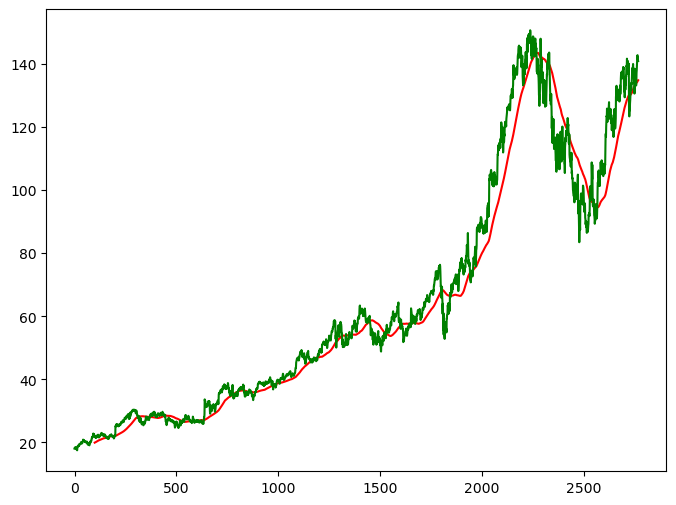

In [8]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days,'red')
plt.plot(data.Close,'green')
plt.show()

In [9]:
ma_200_days=data.Close.rolling(200).mean()

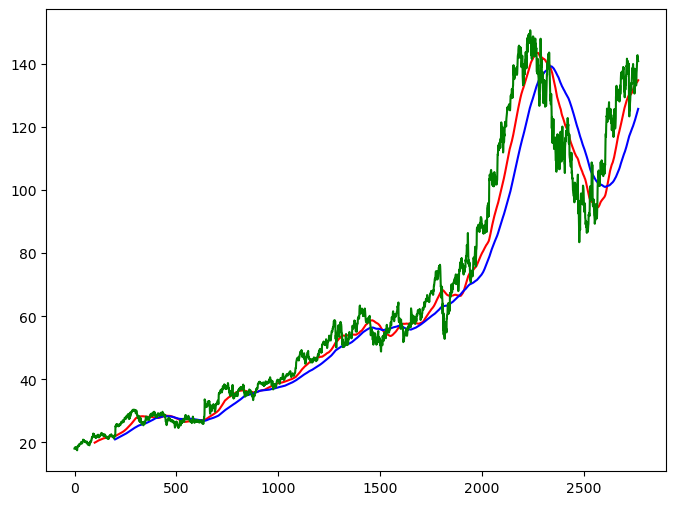

In [10]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days,'red')
plt.plot(ma_200_days,'blue')
plt.plot(data.Close,'green')
plt.show()

In [11]:
data.dropna(inplace=True)

In [12]:
data_train=pd.DataFrame(data.Close[0:int(len(data)*0.80)])
data_test=pd.DataFrame(data.Close[int(len(data)*0.80):len(data)])

In [13]:
data_train.shape[0]

2214

In [14]:
data_test.shape[0]

554

In [15]:
#scaling
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [16]:
data_train_scale=scaler.fit_transform(data_train)

In [17]:
x=[]
y=[]
for i in range(100,data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])

In [18]:
!pip install keras

In [19]:
!pip install tensorflow

In [20]:
x,y = np.array(x), np.array(y)

In [21]:
#kears is a independent layer

In [22]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

# Build the LSTM model
model = Sequential()

# First LSTM layer with input shape
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=((x.shape[1],1))))
model.add(Dropout(0.2))

# Second LSTM layer
model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

# Third LSTM layer
model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

# Fourth LSTM layer
model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

# Dense layer (output)
model.add(Dense(units=1))

# Summary of the model
model.summary()


C:\Users\vinod\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [24]:
model.fit(x,y, epochs=50,batch_size=32, verbose=1)

Epoch 1/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 29s 199ms/step - loss: 0.0444
Epoch 2/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 12s 173ms/step - loss: 0.0041
Epoch 3/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 12s 172ms/step - loss: 0.0042
Epoch 4/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 13s 198ms/step - loss: 0.0054
Epoch 5/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 13s 200ms/step - loss: 0.0035
Epoch 6/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 11s 167ms/step - loss: 0.0028
Epoch 7/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 12s 178ms/step - loss: 0.0061
Epoch 8/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 13s 187ms/step - loss: 0.0033
Epoch 9/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 13s 200ms/step - loss: 0.0026
Epoch 10/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 13s 190ms/step - loss: 0.0029
Epoch 11/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 12s 181ms/step - loss: 0.0026
Epoch 12/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 12s 175ms/step - loss: 0.0025
Epoch 13/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 13s 188ms/step - loss: 0.0024
Epoch 14/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 13s 200ms/step - loss: 0.0023
Epoch 15/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 12s 

In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [26]:
###testing 
pas_100_days=data_train.tail(100)

In [27]:
data_test=pd.concat([pas_100_days,data_test], ignore_index=True)


In [28]:
data_test_scale = scaler.fit_transform(data_test)

In [29]:
x=[]
y=[]
for i in range(100,data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])

In [30]:
x,y = np.array(x), np.array(y)

In [31]:
y_predict=model.predict(x)

18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 137ms/step


In [32]:
scale= 1/scaler.scale_

In [33]:
y_predict=y_predict*scale

In [34]:
y=y*scale

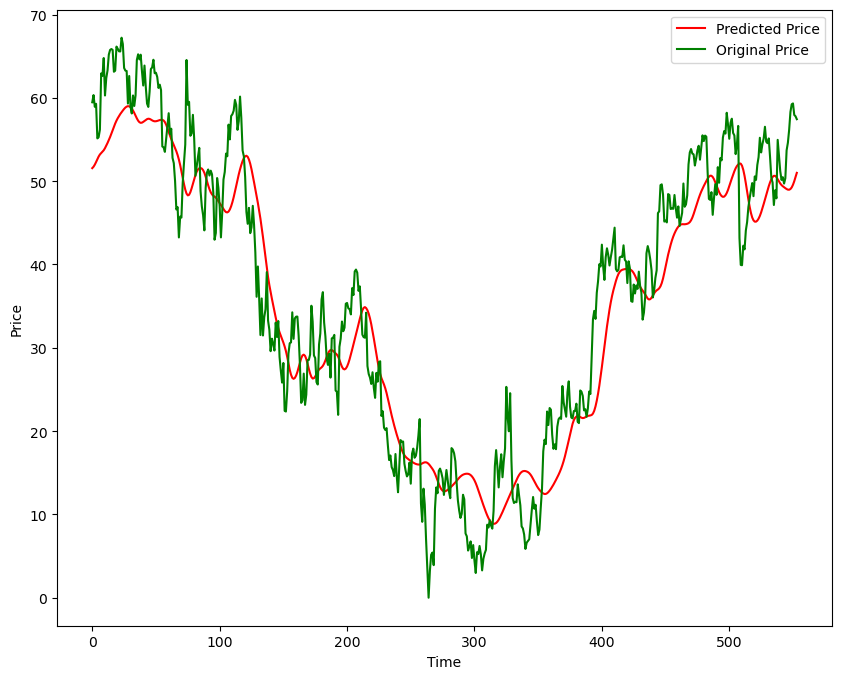

In [35]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'red', label ='Predicted Price')
plt.plot(y, 'green', label='Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [77]:
model.save('Stock Predictions Model.keras')